<a href="https://colab.research.google.com/github/jcsmcmendes/Step_Class/blob/main/Preparing_data_for_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
#Load data and define input variables (features) from the target variable (label)
df = pd.read_excel("student_datasets.xlsx", sheet_name="classification")
X = df[['attendance', 'assignments_completed', 'participation']]
y = df['passed']
print('Input variables:', X.head())
print('Target variables:', y.head())

Input variables:    attendance  assignments_completed  participation
0          51                      6              2
1          92                      5              1
2          14                      7              0
3          71                     10              4
4          60                      8              3
Target variables: 0    0
1    0
2    0
3    1
4    0
Name: passed, dtype: int64


Class distribution: Counter({0: 176, 1: 24})


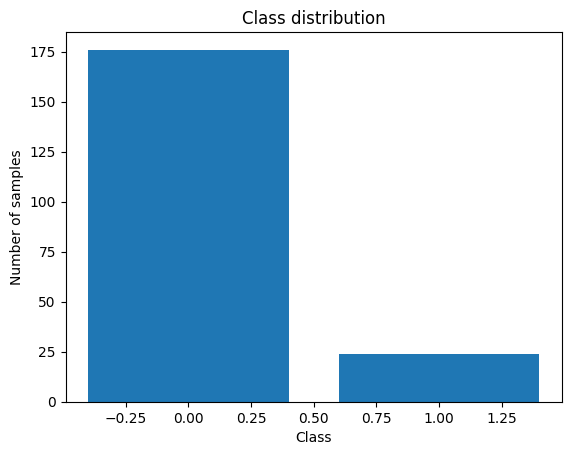

In [3]:
counter = Counter(y)
print("Class distribution:", counter)

# Optional: Bar plot
plt.bar(counter.keys(), counter.values())
plt.title("Class distribution")
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.show()

In [12]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print(f"Original dataset size: {X.shape[0]} samples")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Original dataset size: 200 samples
Training set size: 160 samples
Test set size: 40 samples


Class distribution: Counter({0: 141, 1: 19})


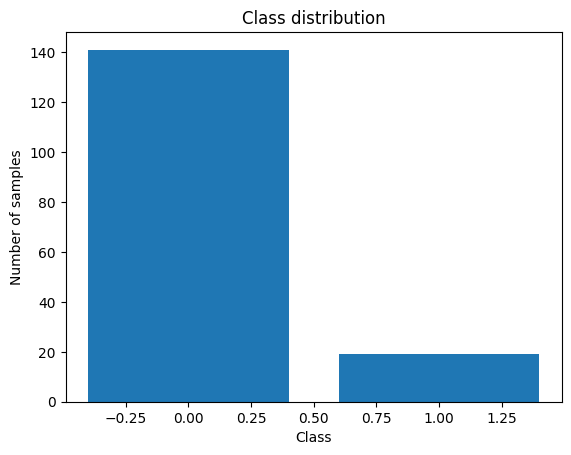

In [13]:
counter = Counter(y_train)
print("Class distribution:", counter)

# Optional: Bar plot
plt.bar(counter.keys(), counter.values())
plt.title("Class distribution")
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.show()

In [6]:
# Save to Excel before resampling
train_df = pd.DataFrame(X_train, columns=X.columns)
train_df['passed'] = y_train.values

test_df = pd.DataFrame(X_test, columns=X.columns)
test_df['passed'] = y_test.values

with pd.ExcelWriter("train_test_original_split.xlsx") as writer:
    train_df.to_excel(writer, sheet_name="train_unbalanced", index=False)
    test_df.to_excel(writer, sheet_name="test", index=False)

In [7]:
# Load training data
df_train = pd.read_excel("train_test_original_split.xlsx", sheet_name="train_unbalanced")
X_split = df_train[['attendance', 'assignments_completed', 'participation']]
y_split = df_train['passed']

Class distribution after undersampling: Counter({0: 19, 1: 19})


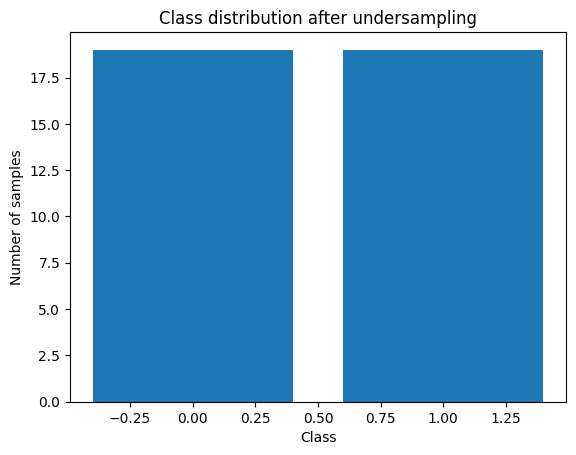

In [8]:
rus = RandomUnderSampler(random_state=42)
X_Under, y_Under = rus.fit_resample(X_split, y_split)

df_under = pd.DataFrame(X_Under, columns=X.columns)
df_under['passed'] = y_Under

# Save new sheet into the same Excel file
with pd.ExcelWriter("train_test_original_split.xlsx", mode='a', if_sheet_exists='replace') as writer:
    df_train.to_excel(writer, sheet_name="train_unbalanced", index=False)  # overwrite just to ensure it's there
    df_under.to_excel(writer, sheet_name="train_undersample", index=False)


# Check result
counter = Counter(y_Under)
print("Class distribution after undersampling:", counter)

plt.bar(counter.keys(), counter.values())
plt.title("Class distribution after undersampling")
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.show()

Class distribution after oversampling: Counter({0: 141, 1: 141})


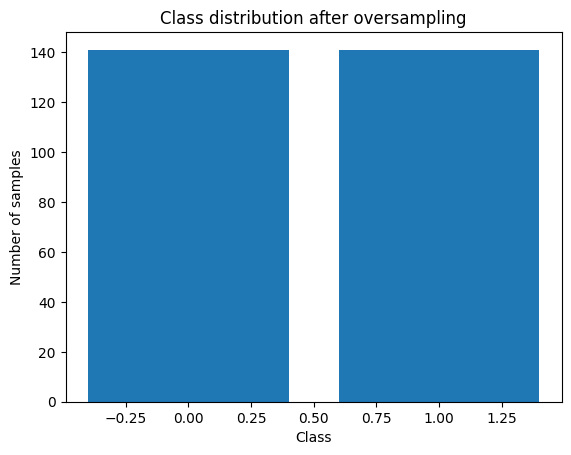

In [9]:
ros = RandomOverSampler(random_state=42)
X_Over, y_Over = ros.fit_resample(X_split, y_split)

df_over = pd.DataFrame(X_Over, columns=X.columns)
df_over['passed'] = y_Over

with pd.ExcelWriter("train_test_original_split.xlsx", mode='a', if_sheet_exists='replace') as writer:
    df_over.to_excel(writer, sheet_name="train_oversample", index=False)

# Check result
counter = Counter(y_Over)
print("Class distribution after oversampling:", counter)

plt.bar(counter.keys(), counter.values())
plt.title("Class distribution after oversampling")
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.show()


Class distribution after SMOTE: Counter({0: 141, 1: 141})


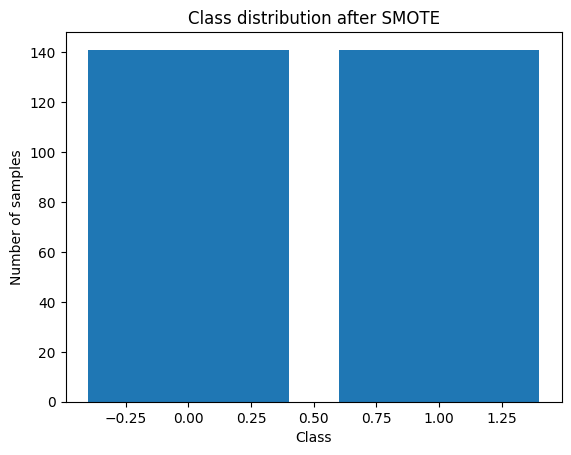

In [10]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_SMOTE, y_SMOTE = smote.fit_resample(X_split, y_split)

df_smote = pd.DataFrame(X_SMOTE, columns=X.columns)
df_smote['passed'] = y_SMOTE

with pd.ExcelWriter("train_test_original_split.xlsx", mode='a', if_sheet_exists='replace') as writer:
    df_smote.to_excel(writer, sheet_name="train_smote", index=False)

# Check result
counter = Counter(y_SMOTE)
print("Class distribution after SMOTE:", counter)

plt.bar(counter.keys(), counter.values())
plt.title("Class distribution after SMOTE")
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.show()
